#  EDA to understand how consumer attributes and loan attributes influence the tendency of default.

    1.Start with Data understanding
    2.Eliminate all columns with null values
    3. Eliminate columns with single data element
    4. Check for missing data and do the correction with mean, median, mode etc to make the data correct
    5. Check for outliers and eliminate outliers.
    6.  filter the dataset for Charged off and name it as defaulters dataset. Calculate percent of defaulters w.r.t overall population.
    7. Univariate analysis by finding default percentage for different employe length( Experience, dti, grade, business purpose, annual income, interest rate etc.
    8. Derive new matrix by converting interest rates over 10% as high and below 10 % as lower to find defaulters fall in which category.
    9. Do the Bivariate analysis to compare defaulter employees for  employee experience with Debt-to-income ratio, annual Income Vs Employee Experience, Loan Amount and experience, Interest rate and Loan Amount

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [117]:
# Read the file and get it to dataset and check the shape
inp1= pd.read_csv('loan.csv')
inp1.shape

(39717, 111)

In [118]:
# Removing those columns which has all the null values, as they are useless. ( 44 Columns out of 111 have null values) 
inp2= inp1.dropna(how='all', axis=1)
inp2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [119]:
# Checking for data set and finding how many columns have null values
inp2.isnull().sum().sort_values()

id                                0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
policy_code                       0
open_acc                          0
pub_rec                           0
revol_bal                         0
addr_state                        0
last_pymnt_amnt                   0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
total_acc                         0
recoveries                        0
zip_code                          0
purpose                           0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                        

In [120]:
# Columns with only one value will not serve the purpose therefore dropping it. 

# Check The value Count of different columns. and drop it 

#inp2['pymnt_plan'].value_counts()
#inp2['initial_list_status'].value_counts()
#inp2['collections_12_mths_ex_med'].value_counts()
#inp2['policy_code'].value_counts()
#inp2['acc_now_delinq'].value_counts()
#inp2['tax_liens'].value_counts()
#inp2['delinq_amnt'].value_counts()

inp2.drop(['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','acc_now_delinq', 'application_type'], axis = 1, inplace = True)
inp2.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,Jan-15,171.62,NaN,May-16,1,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,Apr-13,119.66,NaN,Sep-13,1,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,Jun-14,649.91,NaN,May-16,1,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,Jan-15,357.48,NaN,Apr-16,1,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,May-16,67.79,Jun-16,May-16,1,0.0,0,0.0,0.0


In [121]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  object 
 6   int_rate                  39717 non-null  object 
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_title                 37258 non-null  object 
 11  emp_length                38642 non-null  object 
 12  home_ownership            39717 non-null  object 
 13  annual_inc                39717 non-null  float64
 14  verifi

In [122]:
#inp2.next_pymnt_d.value_counts() # Only 2 unique records.. this column can be dropped 
#inp2.pub_rec_bankruptcies.value_counts() # 3 unique Values... This column can be dropped 
#inp2.chargeoff_within_12_mths.value_counts() # One Single unique value, therefore this column can be dropped
#inp2.emp_title.value_counts() # This column may not be helpful due to diverse title
#inp2.chargeoff_within_12_mths.value_counts() # This column can be dropped 
#inp2.mths_since_last_delinq.value_counts() # This can be dropped as it has many missing values


inp2.drop(['next_pymnt_d', 'pub_rec_bankruptcies','chargeoff_within_12_mths','emp_title', 'mths_since_last_delinq'], axis = 1, inplace = True)
inp2.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,delinq_amnt,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,0,0.0


In [123]:
# Since None is very few we can club None under Other to make Other type category as fourth category. 
inp2.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

## Addressing columns that contain null values paritally, We need to impute with correct values. 
#### Create new Derived columns based on the data 
### Correct the data based on value it contains.
### Remove outliers


In [124]:
# Check for missing Values again 
inp2.isna().sum()

#Fields like emp_title, emp_length,desc,mths_since_last_delinq,mths_since_last_record,
#revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,chargeoff_within_12_mths,tax_liens


id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

### handling missing Values and correcting data and its type

In [125]:
# removing % from int_rate and converting datatype to float 
inp2['interestrate'] = inp2['int_rate'].apply(lambda x: x.replace('%',''))
inp2['interestrate'].astype('float')

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: interestrate, Length: 39717, dtype: float64

In [126]:
inp2.revol_util = inp2['revol_util'].astype(str).apply(lambda x: x.replace('%',''))
inp2.revol_util.astype('float')                                                               


0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 39717, dtype: float64

### Imputing data with Mode for missing employee length

In [127]:
for column in ['emp_length','revol_util']:
    inp2[column].fillna(inp2[column].mode()[0], inplace=True)

In [128]:
# Curating values for emp length and changing data type
inp2['emp_length'].replace("n/a", '')
fmode = inp2['emp_length'].mode()[0]
inp2['emp_length'].astype(str).fillna(fmode,inplace=True)
inp2['emp_length'] = inp2['emp_length'].astype(str).apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))
inp2['emp_length'].astype('float')
#inp2['emp_exp'] = inp2['emp_length'].apply(lambda x:  'Fresher' if 0 < x < 3.0 else 'Intermediate' if 3.0 <= x < 8.0 else 'Expert')

0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39717, dtype: float64

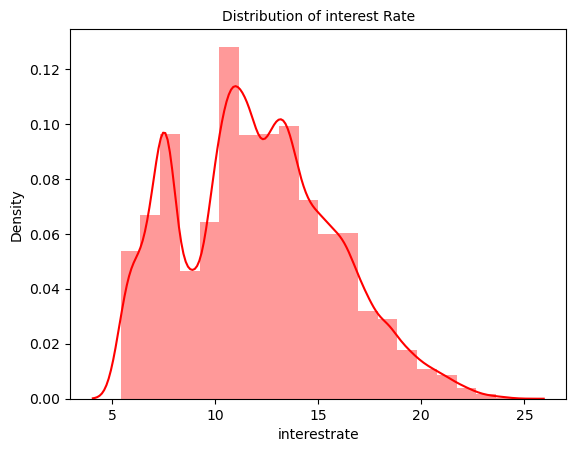

In [129]:
# Chcking inteest rate distribution to find what interest rates are charged. It will help to find which category is charged higher 

sns.distplot(inp2.interestrate, bins =20, color ="Red")
plt.title("Distribution of interest Rate", fontsize = "10")
plt.annotate=True
plt.show()

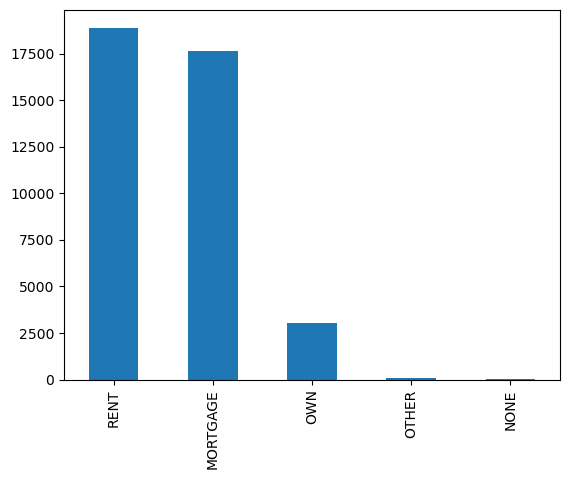

In [130]:
# checking how is the home distribution for total population
inp2['home_ownership'].value_counts().plot.bar()
plt.show()

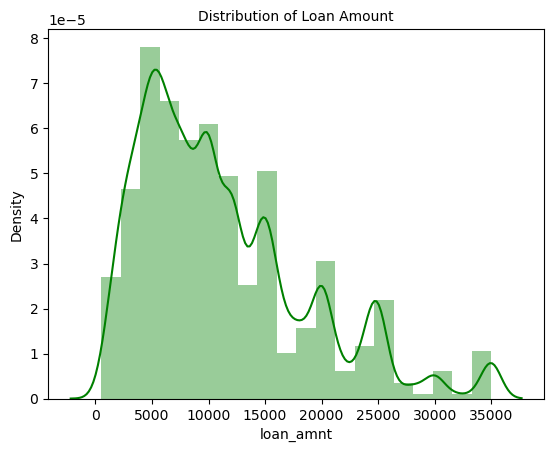

In [131]:
# Check for columns that can provide meaniningfull information by doing univariate analysis

# Checking distribution of loan amount
sns.distplot(inp2.loan_amnt, bins =20, color ="Green")
plt.title("Distribution of Loan Amount", fontsize = "10")
plt.annotate=True
plt.show()

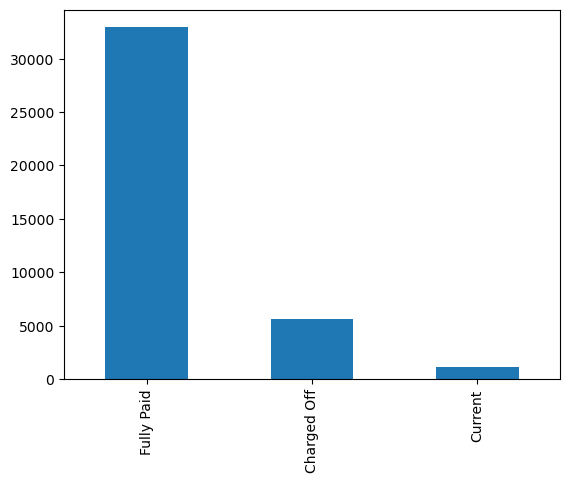

In [132]:
# checking Loan Status 
inp2['loan_status'].value_counts().plot.bar()
plt.show()

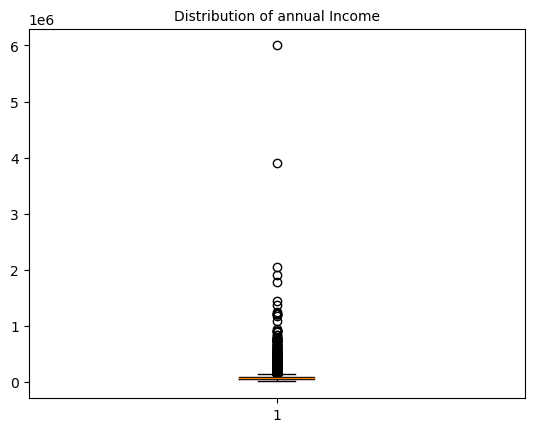

In [133]:
# Chcking annual income distribution using box plots, there are clearly outliers 
plt.boxplot(inp2.annual_inc)
plt.title("Distribution of annual Income", fontsize = "10")

plt.show()

In [134]:
# Checking the annual income details distribution
inp2.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [135]:
inpquantile= inp2.annual_inc.quantile([0.25,0.5,0.75,0.95,0.99])
inpquantile

0.25     40404.00
0.50     59000.00
0.75     82300.00
0.95    142000.00
0.99    234999.36
Name: annual_inc, dtype: float64

In [136]:
# Consider 99 percentile for annual income and removing other outliers
inp99=inp2.annual_inc.quantile(0.99)
inp3 = inp2[inp2.annual_inc<=inp99]
inp3.shape

(39319, 48)

[Text(0.5, 0, 'Annual Income'),
 Text(0.5, 1.0, 'Distribution of Annual Income - 99 percentile')]

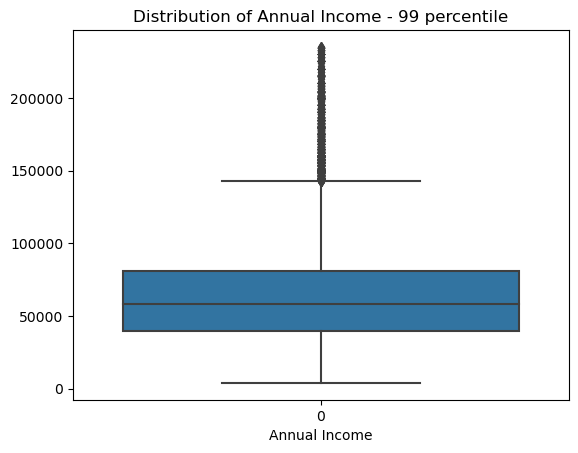

In [137]:
ax= sns.boxplot(inp3.annual_inc)
ax.set(xlabel='Annual Income', title = 'Distribution of Annual Income - 99 percentile')

In [138]:
# We need to do analysis for only Fully Charged and Charged off Status therefore eliminating Loan status as current.
inp3=inp2[~(inp2['loan_status'] == "Current")]
inp3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,delinq_amnt,tax_liens,interestrate
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,1,0,0.0,10.65
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,0,0.0,15.27
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,1,0,0.0,15.96
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,0,0.0,13.49
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,0,0.0,7.90


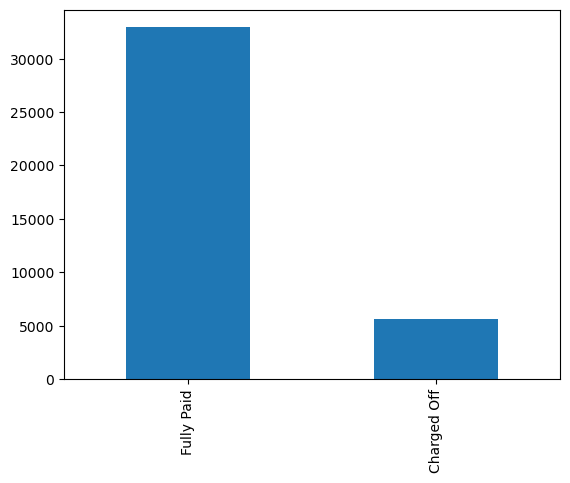

In [139]:
# Plot the chart to find the Loan status of current dataset

inp3['loan_status'].value_counts().plot.bar()
plt.show()

### Derive new Metrics based on the interest rate 

##### Derived variable is categorized as low for interest rate <10% ,
##### medium between 10 % - 15%
##### high for over 15 % 


In [140]:
inp3['int_rate_buc'] = inp3['interestrate'].astype(float).apply(lambda x:  'low' if 0 < x < 10.0 else 'med' if 10.0 <= x < 15.0 else 'high')

#### Create 3 Buckets of Income Group for assessing low income group for candidates less than 25 quantile medium between 25 quantile and 75 quantile and remaining as high income group.


In [141]:
## Create 3 Buckets of Income Group for assessing low income group for candidates less than 25 quantile medium between 25 quantile and 75 quantile and remaining as high income group.
#inp3['annual_inc'].quantile(0.75)

inp3['incomegroup'] = inp3['annual_inc'].apply(lambda x:  'LIG' if 0 < x < 40000.0 else 'MIG' if 4000.00 <= x < 82000.0 else 'HIG')

In [142]:
# Getting the dataset for defaulters Where loan status is Charged off. inp3 is dataset describe defaulters + Fully paid population 

defaulters = inp3[(inp3['loan_status'] =="Charged Off")]
defaulters.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,delinq_amnt,tax_liens,interestrate,int_rate_buc,incomegroup
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.1100,Apr-13,119.66,Sep-13,1,0,0.0,15.27,high,LIG
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,2.0900,Apr-12,152.39,Aug-12,1,0,0.0,21.28,high,MIG
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,2.5200,Nov-12,121.45,Mar-13,1,0,0.0,12.69,med,LIG
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,4.1600,Jul-12,305.38,Nov-12,1,0,0.0,13.49,med,LIG
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,6.3145,Oct-13,325.74,Mar-14,1,0,0.0,10.65,med,HIG


In [143]:
# Another dataset for non defaulers
nondefaulters= inp3[(inp3['loan_status'] =="Fully Paid")]
nondefaulters.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,delinq_amnt,tax_liens,interestrate,int_rate_buc,incomegroup
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.0,Jan-15,171.62,May-16,1,0,0.0,10.65,med,LIG
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.0,Jun-14,649.91,May-16,1,0,0.0,15.96,high,LIG
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.0,Jan-15,357.48,Apr-16,1,0,0.0,13.49,med,MIG
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.0,Jan-15,161.03,Jan-16,1,0,0.0,7.90,low,LIG
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.0,May-16,1313.76,May-16,1,0,0.0,15.96,high,MIG


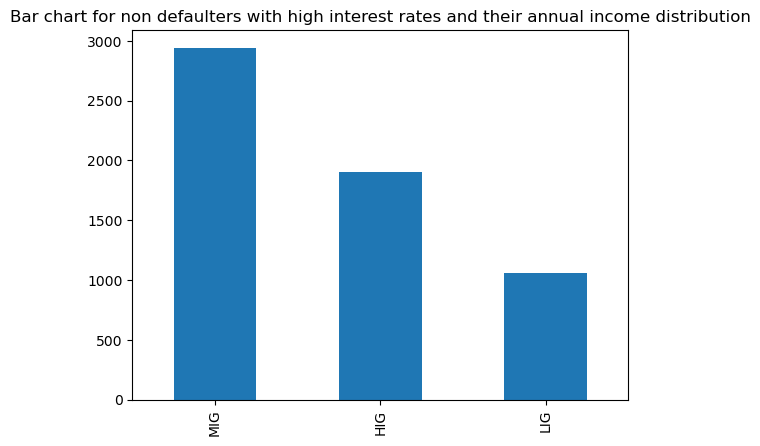

In [144]:
# Analyze non defaulter population who are paying under high interest rate and find their annual income distribution

nondefaulters[(nondefaulters['int_rate_buc'] =="high")]['incomegroup'].value_counts().plot.bar()
plt.title('Bar chart for non defaulters with high interest rates and their annual income distribution')
plt.xlabel ="Income Bucket"

plt.show()


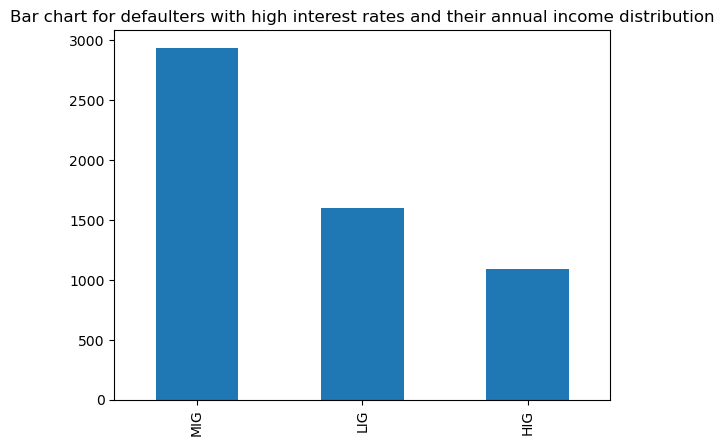

In [145]:
defaulters['incomegroup'].value_counts().plot.bar()
plt.title('Bar chart for defaulters with high interest rates and their annual income distribution')
plt.xlabel ="Income Bucket"

plt.show()

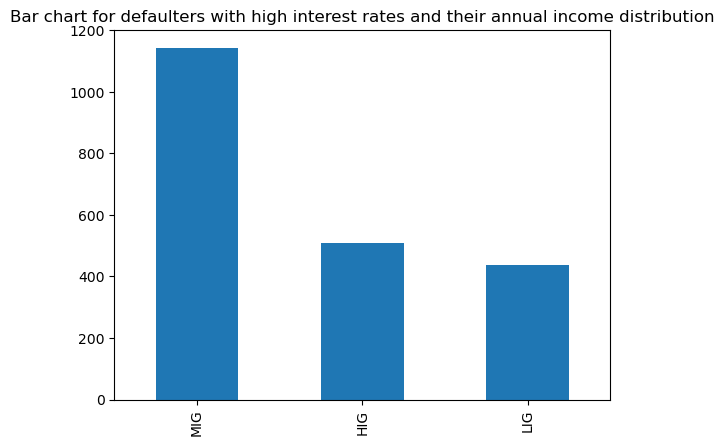

In [146]:
# Find which Income Group is paying high interest rate to relate which category of income group is more prone to default. 

defaulters[(defaulters['int_rate_buc'] =="high")]['incomegroup'].value_counts().plot.bar()
plt.title('Bar chart for defaulters with high interest rates and their annual income distribution')
plt.xlabel ="Income Bucket"

plt.show()

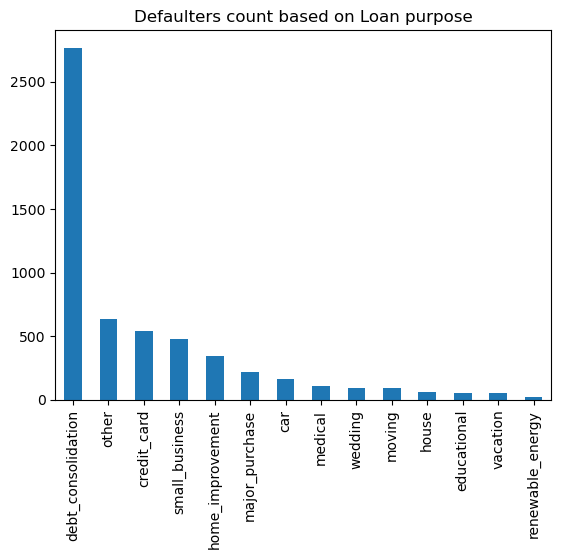

In [147]:
# Analyzing Defaulters dataset for Purpose as key provider. 
defaulters.purpose.value_counts().plot.bar()
plt.title('Defaulters count based on Loan purpose')
plt.show()

## People defaulting primary purpose is Debt consolidation
> Debt Consoldation followed by other and then 
> Credit Card 


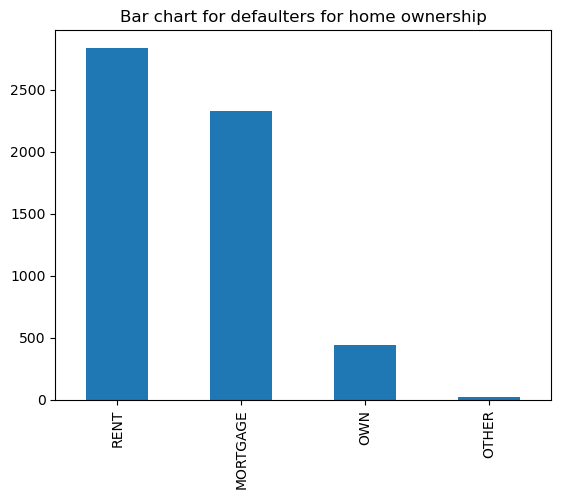

In [148]:
# Check for defaulters who default the most for Home ownerships
defaulters.home_ownership.value_counts().plot.bar()
plt.title('Bar chart for defaulters for home ownership')
plt.show()

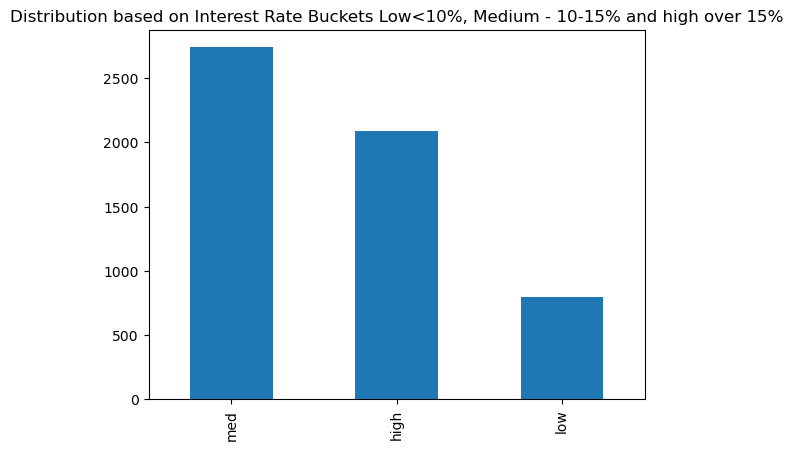

In [149]:
# DEfaulters interest rate falls between 10 - 15%  Categorized as medium , high for over 15 % and low for less than 10 % 

defaulters.int_rate_buc.value_counts().plot.bar()
plt.title('Distribution based on Interest Rate Buckets Low<10%, Medium - 10-15% and high over 15%')
plt.show()

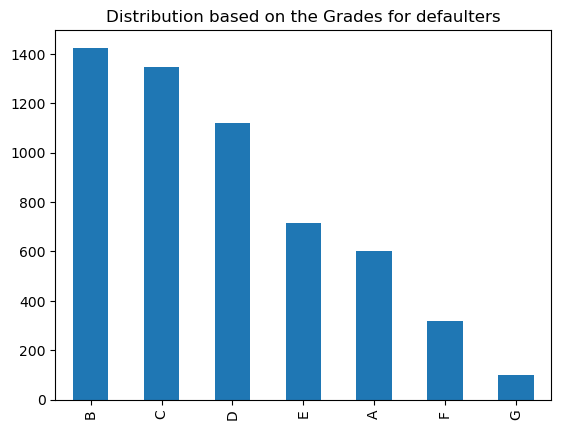

In [150]:
# How is particular grade doing for default population 
defaulters.grade.value_counts().plot.bar()
plt.title('Distribution based on the Grades for defaulters')
plt.show()

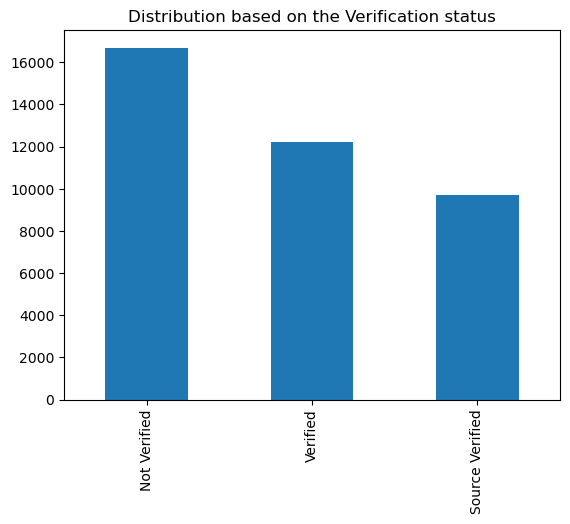

In [151]:
inp3.verification_status.value_counts().plot.bar()
plt.title('Distribution based on the Verification status')
plt.show()

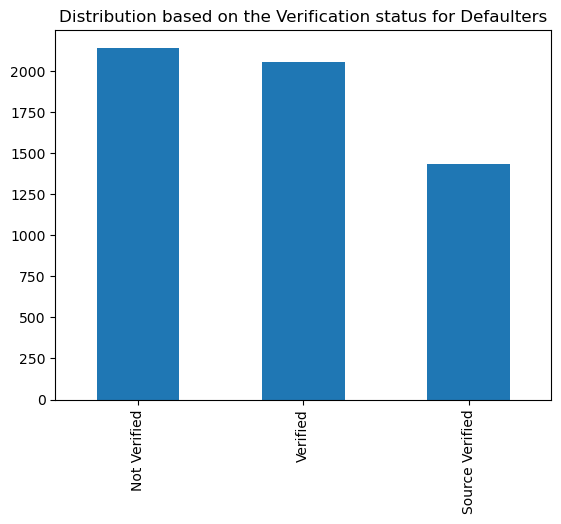

In [152]:
##Not Verified is more likely to default.
# If verification status is source verified, they are less prone to default.


defaulters.verification_status.value_counts().plot.bar()
plt.title('Distribution based on the Verification status for Defaulters')
plt.show()

In [153]:
# Here we are calculating percentage of defaulter population w.r.t to the overall population and find what purpose tops the charts in percentage

purpose_df=pd.DataFrame(data=round((100*defaulters['purpose'].value_counts())/inp3['purpose'].value_counts(),2))
purpose_df.rename(columns={'purpose':'defaulter percentage'},inplace=True)
purpose_df.sort_values(by='defaulter percentage',ascending=False,inplace=True)
purpose_df

,defaulter percentage
small_business,27.08
renewable_energy,18.63
educational,17.23
other,16.38
house,16.08
moving,15.97
medical,15.57
debt_consolidation,15.33
vacation,14.13
home_improvement,12.07


In [154]:
nondefaulters['purpose'].value_counts()

debt_consolidation    15288
credit_card            4485
other                  3232
home_improvement       2528
major_purchase         1928
car                    1339
small_business         1279
wedding                 830
medical                 575
moving                  484
vacation                322
house                   308
educational             269
renewable_energy         83
Name: purpose, dtype: int64

In [155]:
defaulters['purpose'].value_counts()

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: purpose, dtype: int64

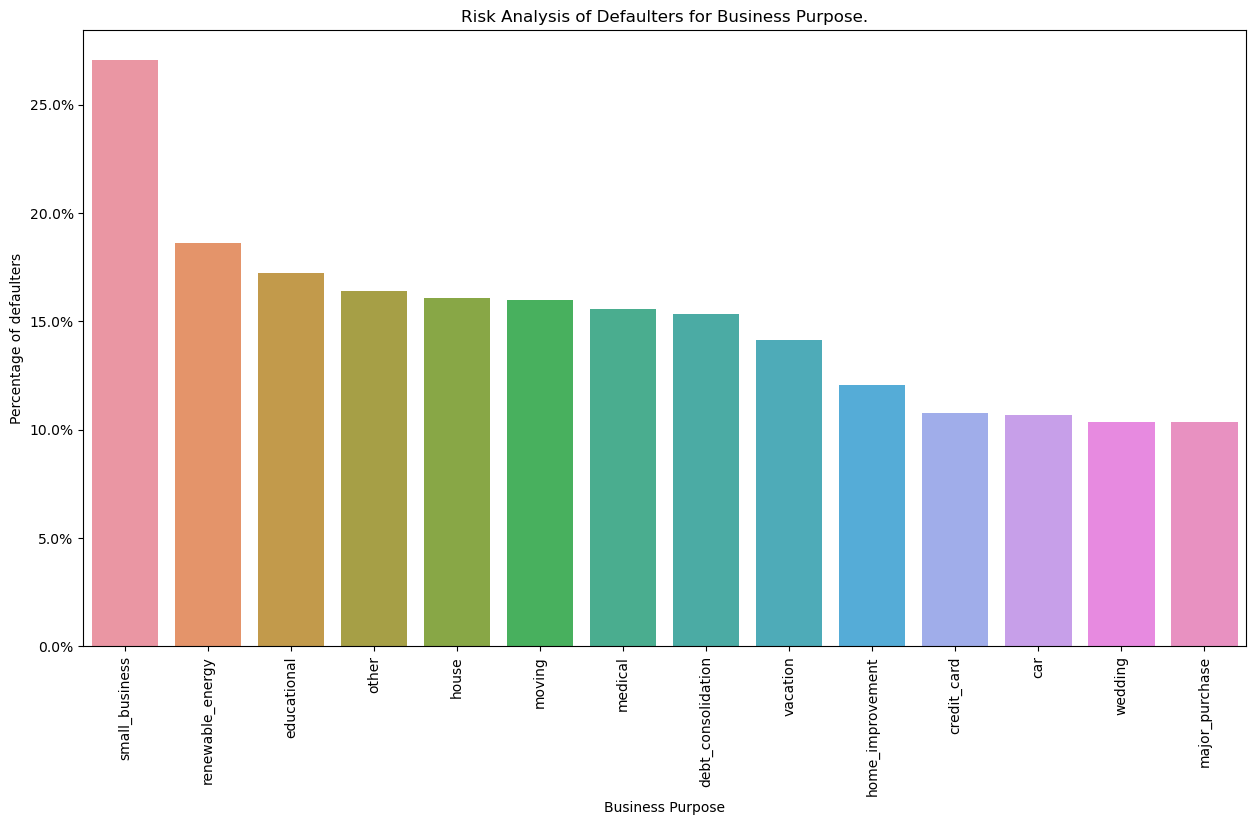

In [156]:
# Plot the bar chart to visualize the defaulters percentage based on purpose. 
import matplotlib.ticker as mtick
plt.figure(figsize=(15,8))
bp = sns.barplot(data=purpose_df, y= purpose_df['defaulter percentage'], x=purpose_df.index)
bp.set(ylabel='Percentage of defaulters', xlabel='Business Purpose',title='Risk Analysis of Defaulters for Business Purpose.')
bp.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

In [157]:
# Calculate the percent of Loan  defaulters according to loan purpose,Grade, employent length and dti 

purpose_df=pd.DataFrame(data=round((100*defaulters['purpose'].value_counts())/inp3['purpose'].value_counts(),2))
purpose_df.rename(columns={'purpose':'defaulter percentage'},inplace=True)
purpose_df.sort_values(by='defaulter percentage',ascending=False,inplace=True)
purpose_df

,defaulter percentage
small_business,27.08
renewable_energy,18.63
educational,17.23
other,16.38
house,16.08
moving,15.97
medical,15.57
debt_consolidation,15.33
vacation,14.13
home_improvement,12.07


In [158]:
# Creating dataset that gives defaulter percentage based on Grade
grade_df =pd.DataFrame(data=round((100*defaulters['grade'].value_counts())/inp3['grade'].value_counts(),2))
grade_df.rename(columns={'grade':'defaulter percentage'},inplace=True)
grade_df.sort_values(by='defaulter percentage',ascending=False,inplace=True)
grade_df

,defaulter percentage
G,33.78
F,32.68
E,26.85
D,21.99
C,17.19
B,12.21
A,5.99


### Defaulters percentage is high for Grade G and low for Grade A


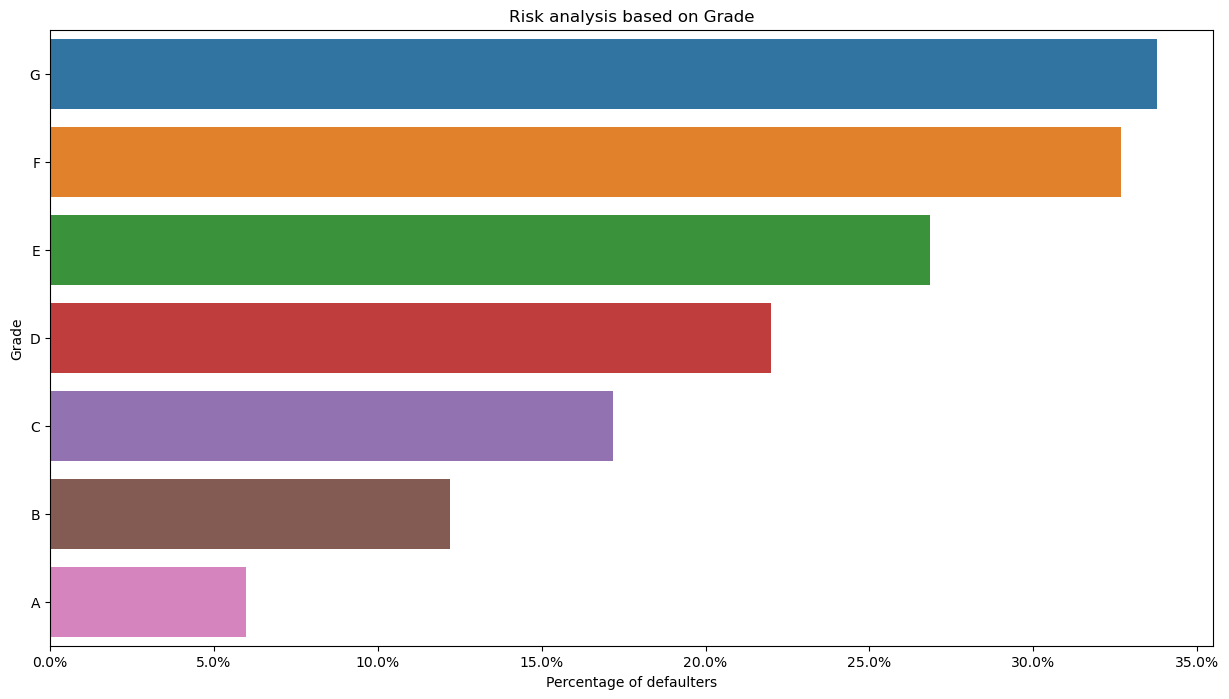

In [159]:

plt.figure(figsize=(15,8))
bp = sns.barplot(data=grade_df, x= grade_df['defaulter percentage'], y=grade_df.index)
bp.set(xlabel='Percentage of defaulters', ylabel='Grade', title ='Risk analysis based on Grade')
bp.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [160]:
interestdf =pd.DataFrame(data=round((100*defaulters['interestrate'].value_counts())/inp3['interestrate'].value_counts(),2))
interestdf.rename(columns={'interestrate':'defaulter percentage'},inplace=True)
interestdf.sort_values(by='defaulter percentage',ascending=False,inplace=True)
interestdf

,defaulter percentage
14.62,100.0
16.08,100.0
22.94,100.0
22.64,100.0
15.01,100.0
...,...
7.12,NaN
8.70,NaN
9.67,NaN
9.70,NaN


In [161]:
EmployeeExp_df =pd.DataFrame(data=round((100*defaulters['emp_length'].value_counts())/inp3['emp_length'].value_counts(),2))
EmployeeExp_df.rename(columns={'emp_length':'defaulter percentage'},inplace=True)
EmployeeExp_df.sort_values(by='defaulter percentage',ascending=False, inplace=True)
EmployeeExp_df

,defaulter percentage
10,16.37
7,15.37
1,14.39
5,14.34
0,14.17
6,14.16
8,14.15
3,13.83
4,13.82
2,13.21


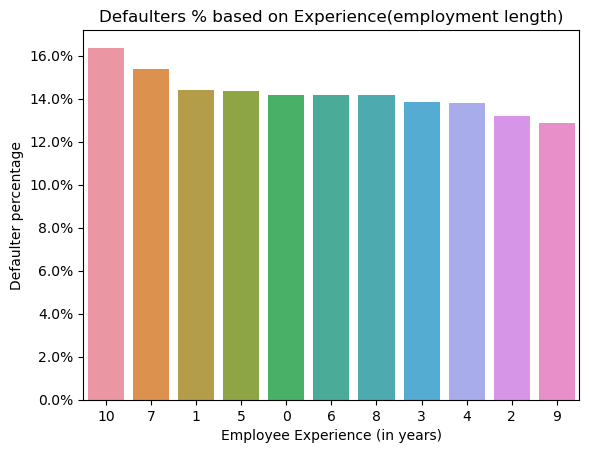

<Figure size 1800x1200 with 0 Axes>

In [162]:
bp = sns.barplot(data=EmployeeExp_df, y= EmployeeExp_df['defaulter percentage'], x=EmployeeExp_df.index)
plt.figure(figsize=(18,12))
bp.set(xlabel='Employee Experience (in years)', ylabel = 'Defaulter percentage',title ='Defaulters % based on Experience(employment length)')

bp.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

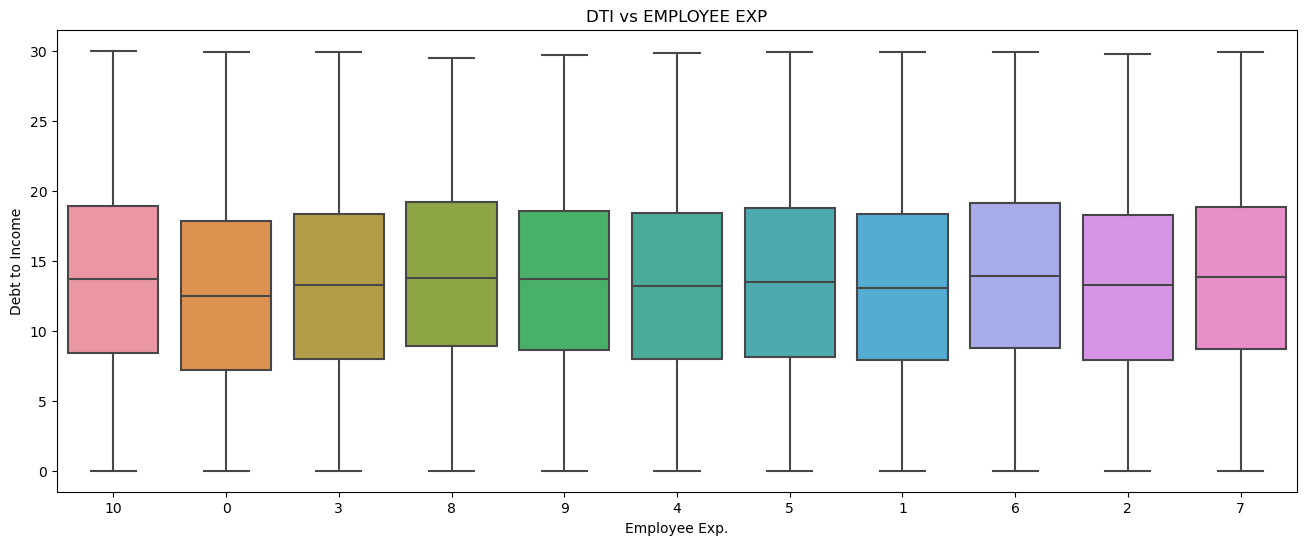

In [163]:


plt.figure(figsize=(16,6))
ax=sns.boxplot(x='emp_length',y='dti',data=inp3)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP')
plt.show()

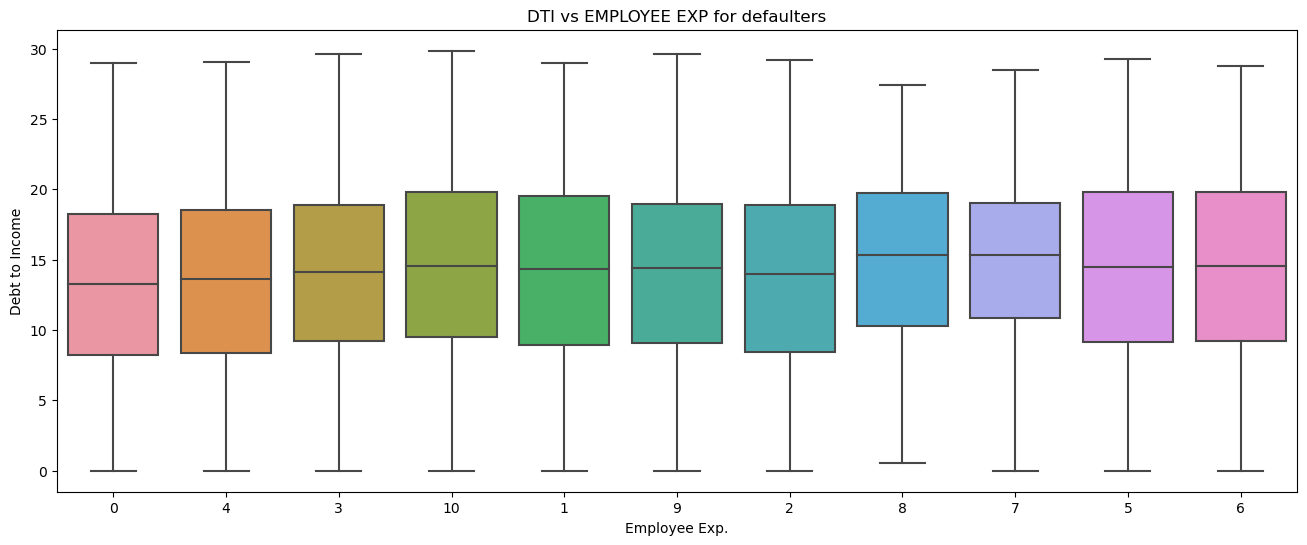

In [164]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='emp_length',y='dti',data=defaulters)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP for defaulters')
plt.show()

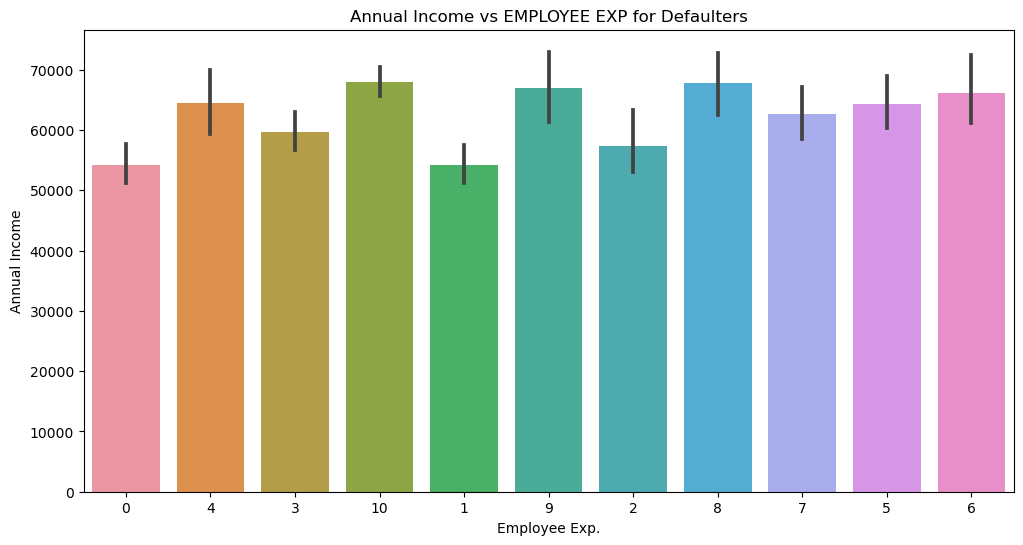

In [165]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='emp_length',y='annual_inc',data=defaulters)
ax.set(xlabel='Employee Exp.', ylabel='Annual Income',title= 'Annual Income vs EMPLOYEE EXP for Defaulters')
plt.show()

###  Candidates with 8 years of experience have more annual income compare to 10 years in case of defaulters however overall population 10 years of experience has higher annual income than lower experience.


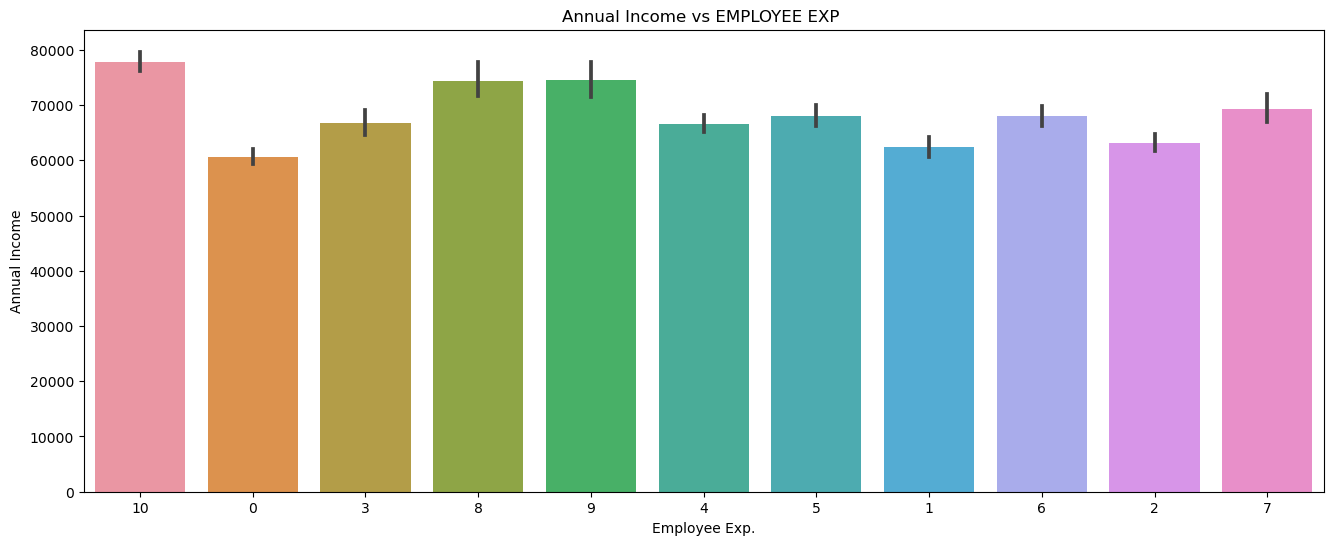

In [166]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x='emp_length',y='annual_inc',data=inp3)
ax.set(xlabel='Employee Exp.', ylabel='Annual Income',title= 'Annual Income vs EMPLOYEE EXP ')
plt.show()

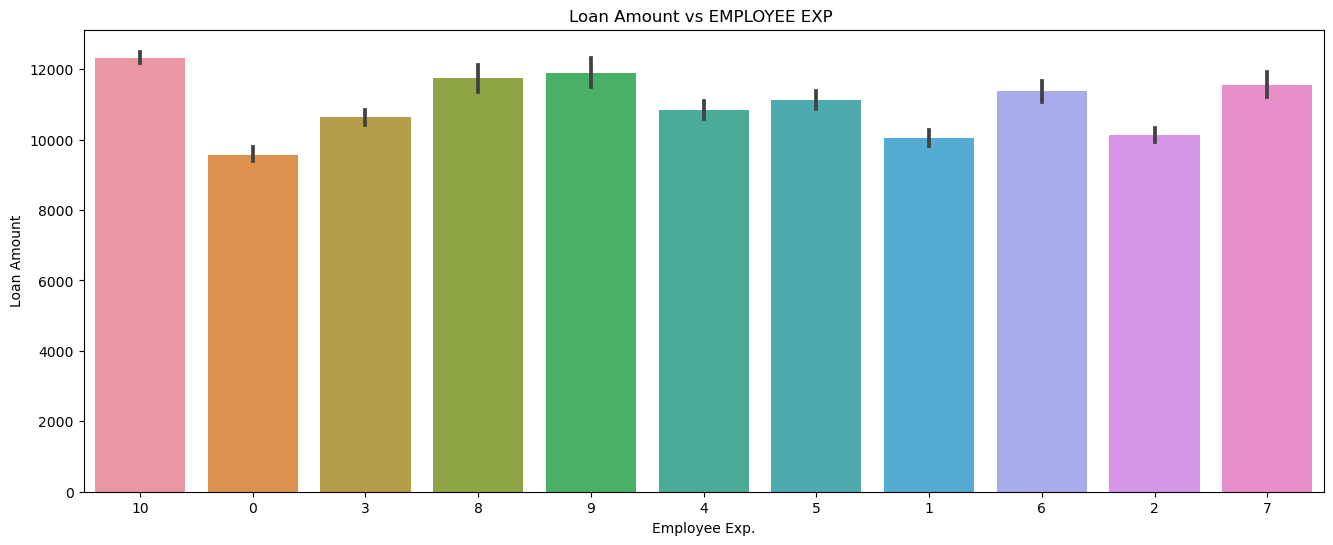

In [167]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x='emp_length',y='loan_amnt',data=inp3)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title= 'Loan Amount vs EMPLOYEE EXP ')
plt.show()

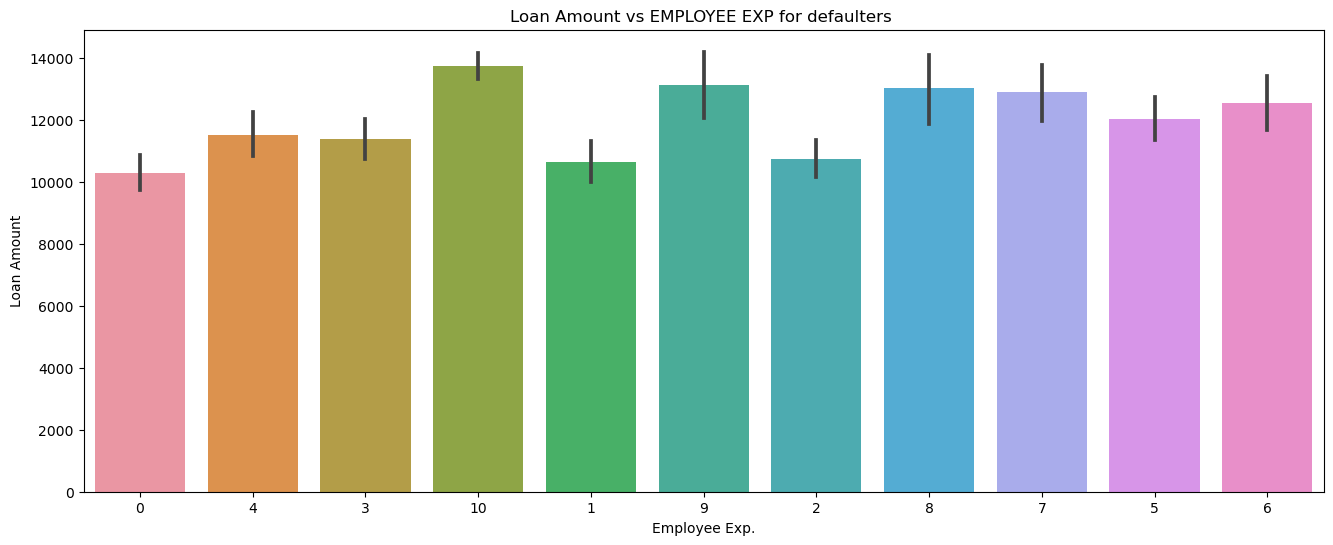

In [168]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x='emp_length',y='loan_amnt',data=defaulters)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title= 'Loan Amount vs EMPLOYEE EXP for defaulters ')
plt.show()

### 10 years or more experience have more debt-to-Income ratio compared to other experience range. It implies if 10 or above experience has higher dti( means more debt comare to their income) will default comaritively higher.  


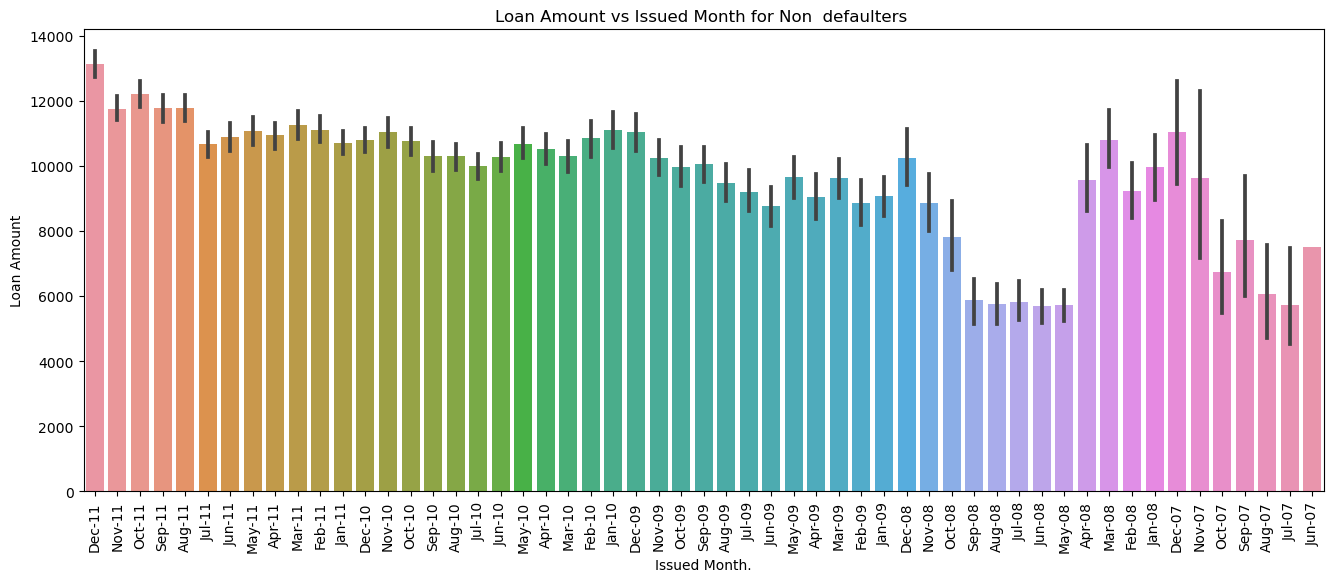

In [169]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x='issue_d',y='loan_amnt',data=nondefaulters)
ax.set(xlabel='Issued Month.', ylabel='Loan Amount',title= 'Loan Amount vs Issued Month for Non  defaulters ')
plt.xticks(rotation=90)
plt.show()

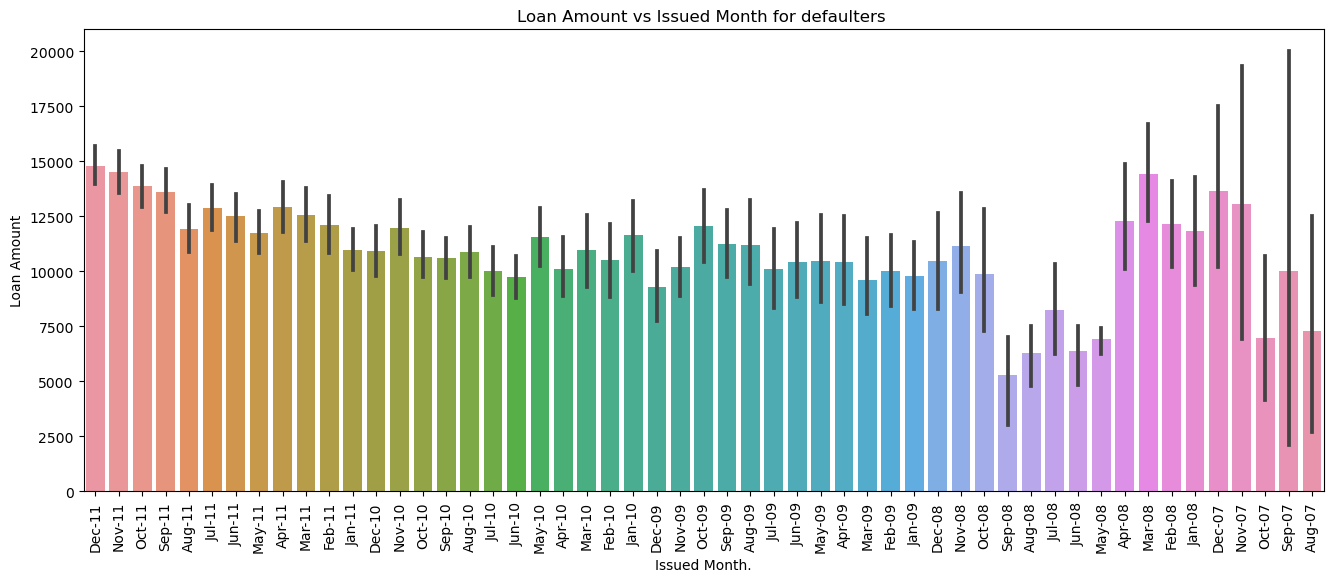

In [170]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x='issue_d',y='loan_amnt',data=defaulters)
ax.set(xlabel='Issued Month.', ylabel='Loan Amount',title= 'Loan Amount vs Issued Month for defaulters ')
plt.xticks(rotation=90)
plt.show()

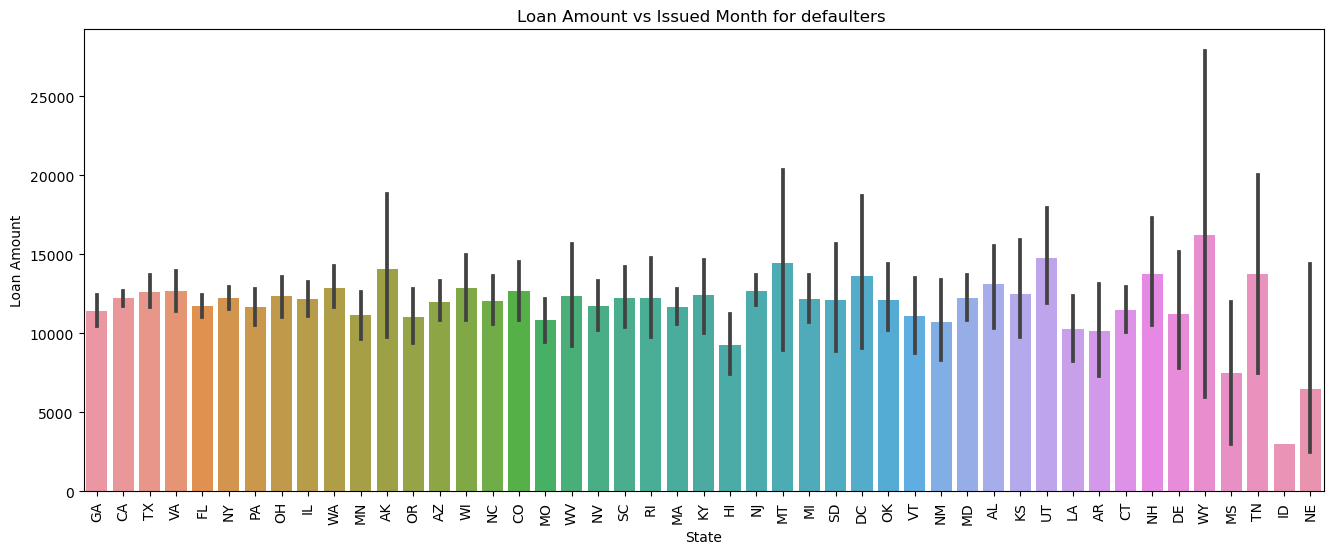

In [171]:
plt.figure(figsize=(16,6))
ax=sns.barplot(x='addr_state',y='loan_amnt',data=defaulters)
ax.set(xlabel='State', ylabel='Loan Amount',title= 'Loan Amount vs Issued Month for defaulters ')
plt.xticks(rotation=90)
plt.show()

In [172]:
# Finding defaulter percentage based on state, 
State_df =pd.DataFrame(data=round((100*defaulters['addr_state'].value_counts())/inp3['addr_state'].value_counts(),2))
State_df.rename(columns={'addr_state':'defaulter percentage'},inplace=True)
State_df.sort_values(by='defaulter percentage',ascending=False, inplace=True)
State_df

,defaulter percentage
NE,60.00
NV,22.55
SD,19.35
AK,19.23
FL,18.12
MO,17.01
HI,16.87
ID,16.67
NM,16.39
OR,16.32


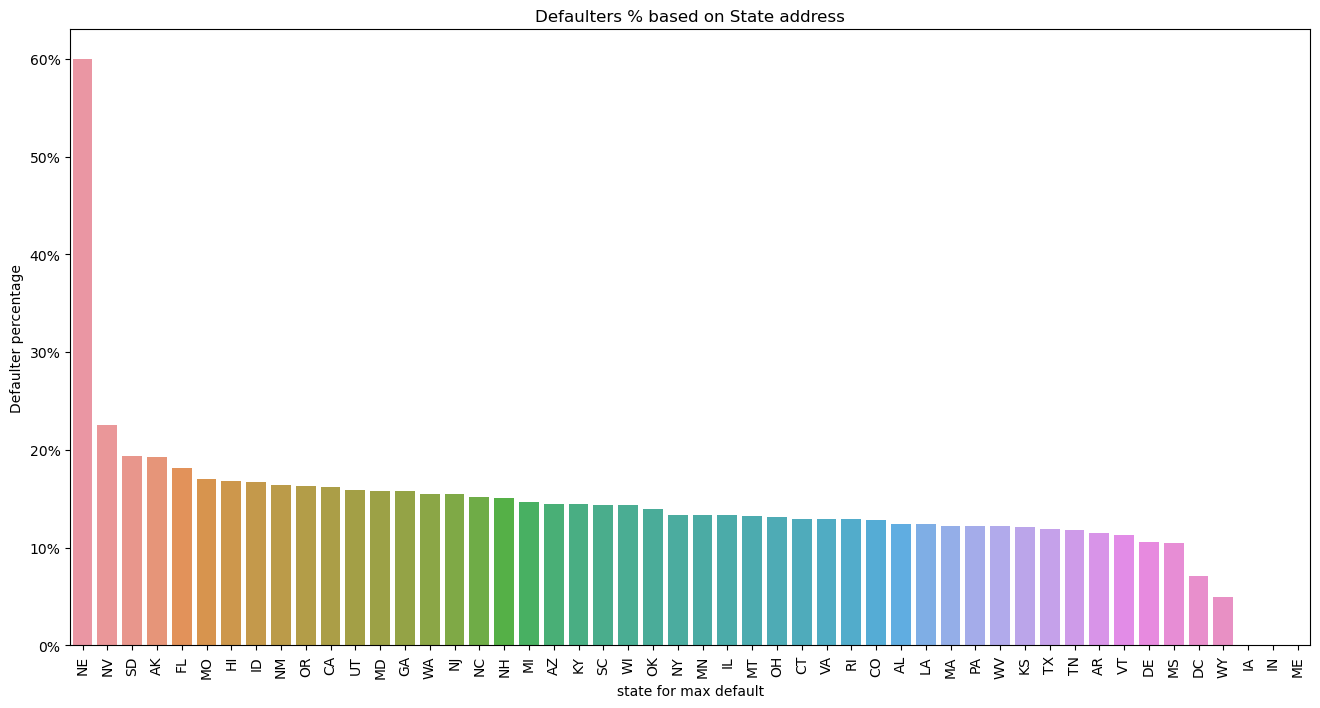

In [173]:
plt.figure(figsize=(16,8))
bp = sns.barplot(data=State_df, y= State_df['defaulter percentage'], x=State_df.index)

bp.set(xlabel='state for max default', ylabel = 'Defaulter percentage',title ='Defaulters % based on State address')
plt.xticks(rotation =90)
bp.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Conclusions

> Fully paid population is way more than Charged off Population. 

>Home Ownership overall has higher in Rental Category.
>Business purpose -  debt consolidation tops as the major reason for loan default among population who defaulted. 

>If Verification Status is Not Verified; it is more likely to default. compare to verification status of source verified, they are less prone to default.

>Interest rate over 10% is more likely to default compared to low interest rates.  

>Middle Income Group(MIG) pays high interest compared to other income group for complete population. 
HIG is less likely to default. 

>Candidates with 8 years of experience have more annual income compared to 10 years in case of defaulters however overall population 10 years of experience has higher annual income than lower experience. This gives interesting fact that if experience is more and comparatively their annual income is lower compared to lower experience band, it may be indicator for default. 

>10 years or more experience have more debt-to-Income ratio compared to other experience range. It implies if 10 or above experience has higher dti( means more debt compared to their income) will default compared to other lower experience or lower dti.  

>In Defaulters Category 10 years and above experience takes higher loan compared to other experience range. This may act as red flag when combining other factors like, purpose, loan amount, dti. 
